In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")
pd.set_option('display.max_columns', None)

In [2]:
df_goalkeeping_advanced_stats_general = pd.read_csv("./arquivos/rodada37/squad_advanced_goalkeeping_stats_serie_a.csv")
df_goalkeeping_advanced_stats_opponent = pd.read_csv("./arquivos/rodada37/squad_advanced_goalkeeping_opponent_stats_serie_a.csv")

In [3]:
df_goalkeeping_advanced_stats_general.head()

,Squad,# Pl,90s,GA,PKA,FK,CK,OG,PSxG,PSxG/SoT,PSxG+/-,/90,Cmp,Att,Cmp%,Att.1,Thr,Launch%,AvgLen,Att.2,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,América (MG),4,35.0,74,4,3,5,2,65.6,0.31,-6.4,-0.18,178,404,44.1,593,162,45.5,37.0,263,51.0,39.5,627,53,8.5,33,0.94,6.8
1,Ath Paranaense,2,35.0,39,3,1,6,0,41.7,0.24,2.7,0.08,127,436,29.1,644,143,45.2,38.2,288,50.3,42.2,505,34,6.7,24,0.69,12.2
2,Atlético Mineiro,2,35.0,27,1,1,1,1,37.3,0.30,11.3,0.32,188,465,40.4,846,129,44.1,37.0,188,48.9,40.9,520,30,5.8,33,0.94,14.6
3,Bahia,3,35.0,48,6,1,2,1,55.6,0.29,8.6,0.25,192,482,39.8,858,132,40.8,35.7,244,54.1,42.6,432,27,6.3,39,1.11,15.1
4,Botafogo (RJ),2,35.0,33,0,0,2,1,45.6,0.29,13.6,0.39,195,513,38.0,766,185,49.7,30.4,224,58.9,44.9,561,31,5.5,47,1.34,18.4


In [4]:
df_goalkeeping_advanced_stats_opponent.head()

,Squad,# Pl,90s,GA,PKA,FK,CK,OG,PSxG,PSxG/SoT,PSxG+/-,/90,Cmp,Att,Cmp%,Att.1,Thr,Launch%,AvgLen,Att.2,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,vs América (MG),4,35.0,39,4,1,2,0,46.6,0.27,7.6,0.22,141,423,33.3,796,153,37.3,35.2,290,43.4,36.9,521,19,3.6,26,0.74,13.6
1,vs Ath Paranaense,2,35.0,47,4,0,5,0,50.4,0.30,3.4,0.10,192,483,39.8,830,172,36.9,34.6,336,52.7,41.5,518,29,5.6,38,1.09,14.8
2,vs Atlético Mineiro,2,35.0,46,6,3,3,1,51.0,0.29,6.0,0.17,135,353,38.2,675,162,35.0,34.2,255,45.9,39.4,486,38,7.8,27,0.77,11.9
3,vs Bahia,3,35.0,44,3,1,6,2,44.6,0.28,2.6,0.08,126,378,33.3,718,187,35.0,34.2,250,50.8,40.3,516,38,7.4,31,0.89,13.4
4,vs Botafogo (RJ),2,35.0,56,4,0,8,2,48.8,0.27,-5.2,-0.15,100,338,29.6,719,143,32.5,32.7,258,40.3,35.1,488,26,5.3,30,0.86,14.1


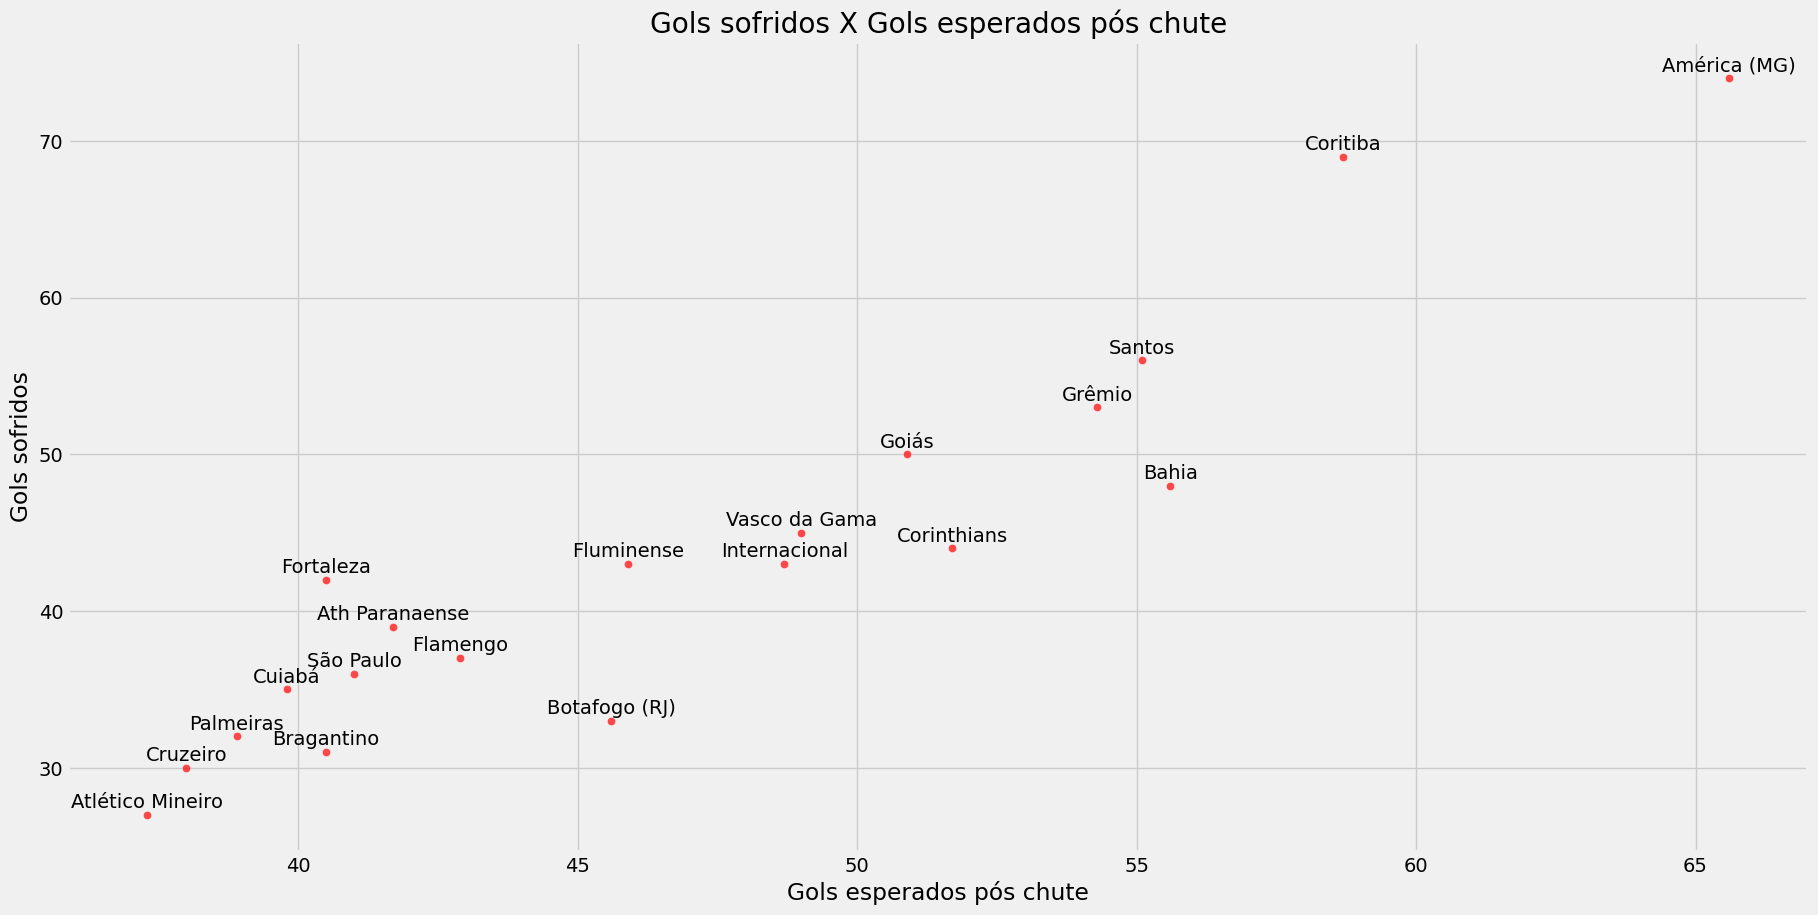

In [5]:
df_ordenado_por_gols_sofridos = df_goalkeeping_advanced_stats_general.sort_values('GA', ascending=False)
plt.figure(figsize=(20, 10))
plt.title("Gols sofridos X Gols esperados pós chute")
plt.xlabel("Gols esperados pós chute")
plt.ylabel("Gols sofridos")
sns.scatterplot(x = 'PSxG', y = 'GA', data = df_ordenado_por_gols_sofridos, color='red', alpha=0.7)
for index, row in df_ordenado_por_gols_sofridos.iterrows():
    plt.annotate(row['Squad'], (row['PSxG'], row['GA']), textcoords="offset points", xytext=(0,5), ha='center')

C:\Users\Adriana\AppData\Local\Temp\ipykernel_9880\112872097.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Squad', y = 'PSxG+/-', data = df_ordenado_por_gols_esperados_pos_chutes_menos_ga, palette = colors)


<Axes: title={'center': 'Ranking de gols esperados pós chute subtraindo os gols sofridos'}, xlabel='Time', ylabel='Gols esperados pós chute subtraindo os gols sofridos'>

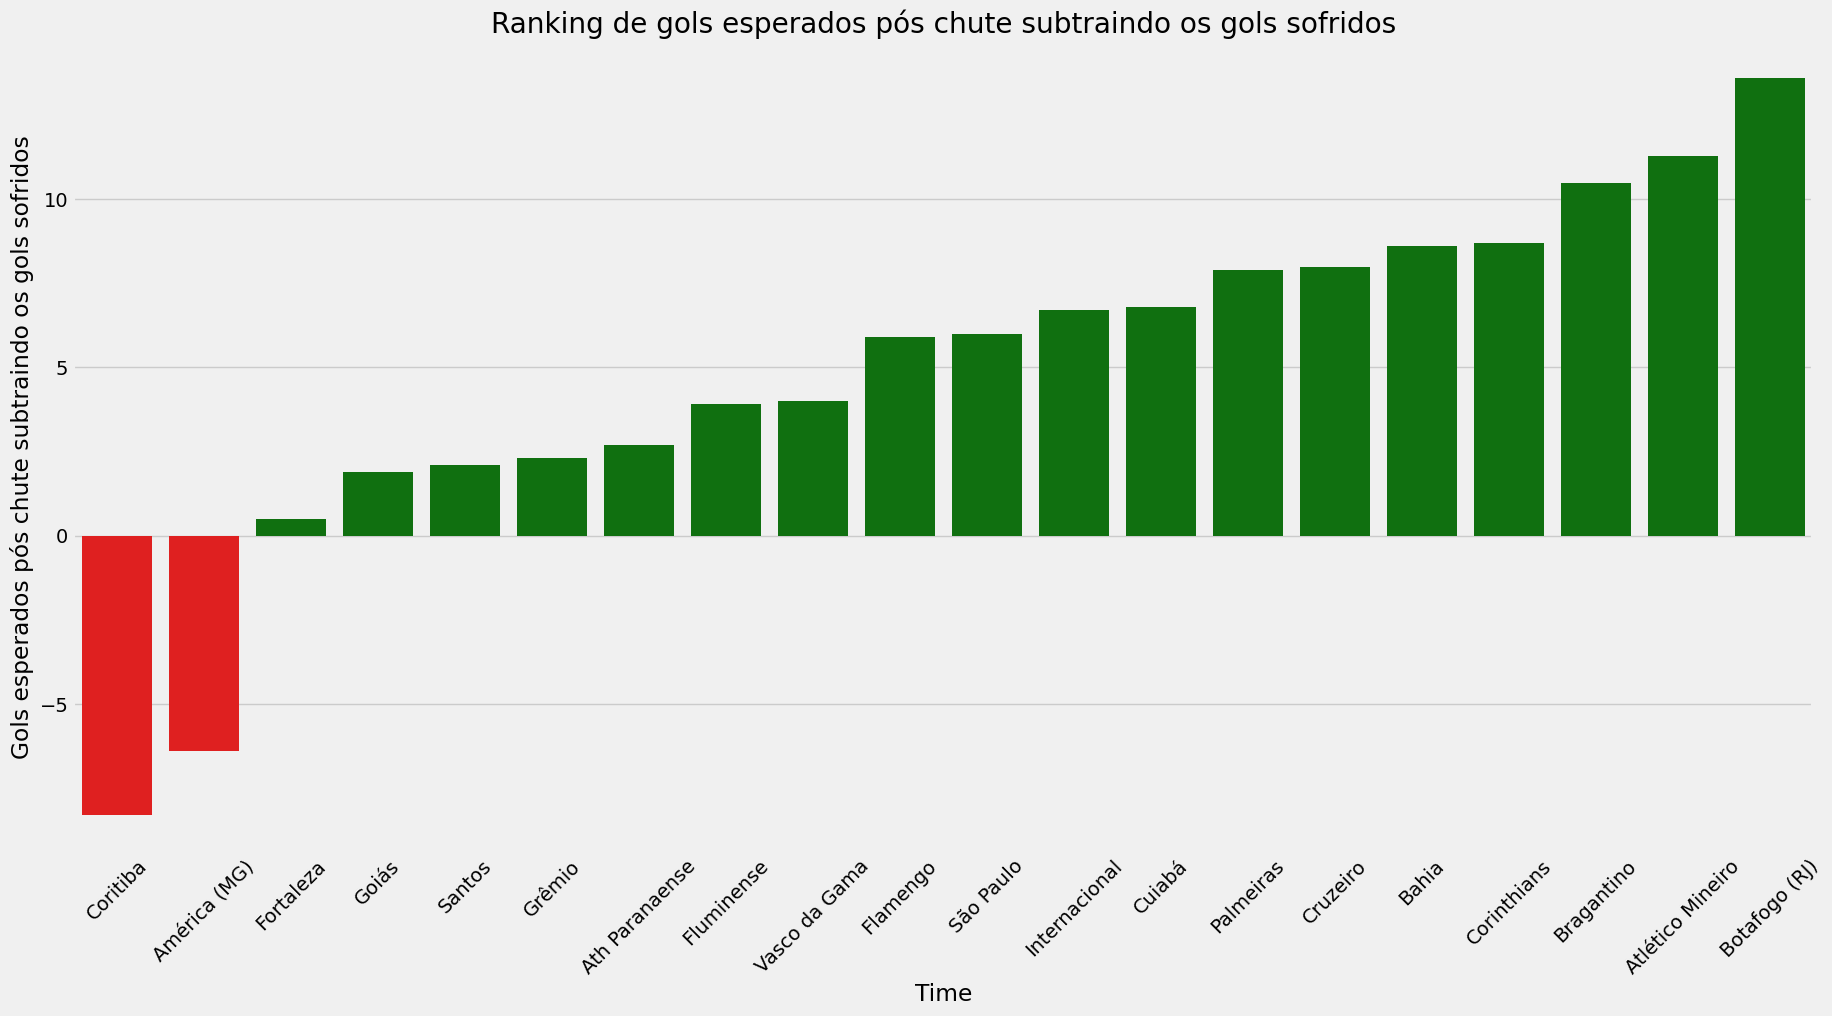

In [6]:
df_ordenado_por_gols_esperados_pos_chutes_menos_ga = df_goalkeeping_advanced_stats_general.sort_values('PSxG+/-', ascending=True)
plt.figure(figsize=(20, 10))
plt.title("Ranking de gols esperados pós chute subtraindo os gols sofridos")
plt.xlabel("Time")
plt.ylabel("Gols esperados pós chute subtraindo os gols sofridos")
plt.xticks(rotation=45)
colors = ['red' if x < 0 else 'green' for x in df_ordenado_por_gols_esperados_pos_chutes_menos_ga['PSxG+/-']]
sns.barplot(x = 'Squad', y = 'PSxG+/-', data = df_ordenado_por_gols_esperados_pos_chutes_menos_ga, palette = colors)

C:\Users\Adriana\AppData\Local\Temp\ipykernel_9880\431119298.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Squad', y = '/90', data = df_ordenado_por_gols_esperados_pos_chutes_menos_ga, palette = colors)


<Axes: title={'center': 'Ranking de gols esperados pós chute subtraindo os gols sofridos por 90 min'}, xlabel='Time', ylabel='Gols esperados pós chute subtraindo os gols sofridos por 90 min'>

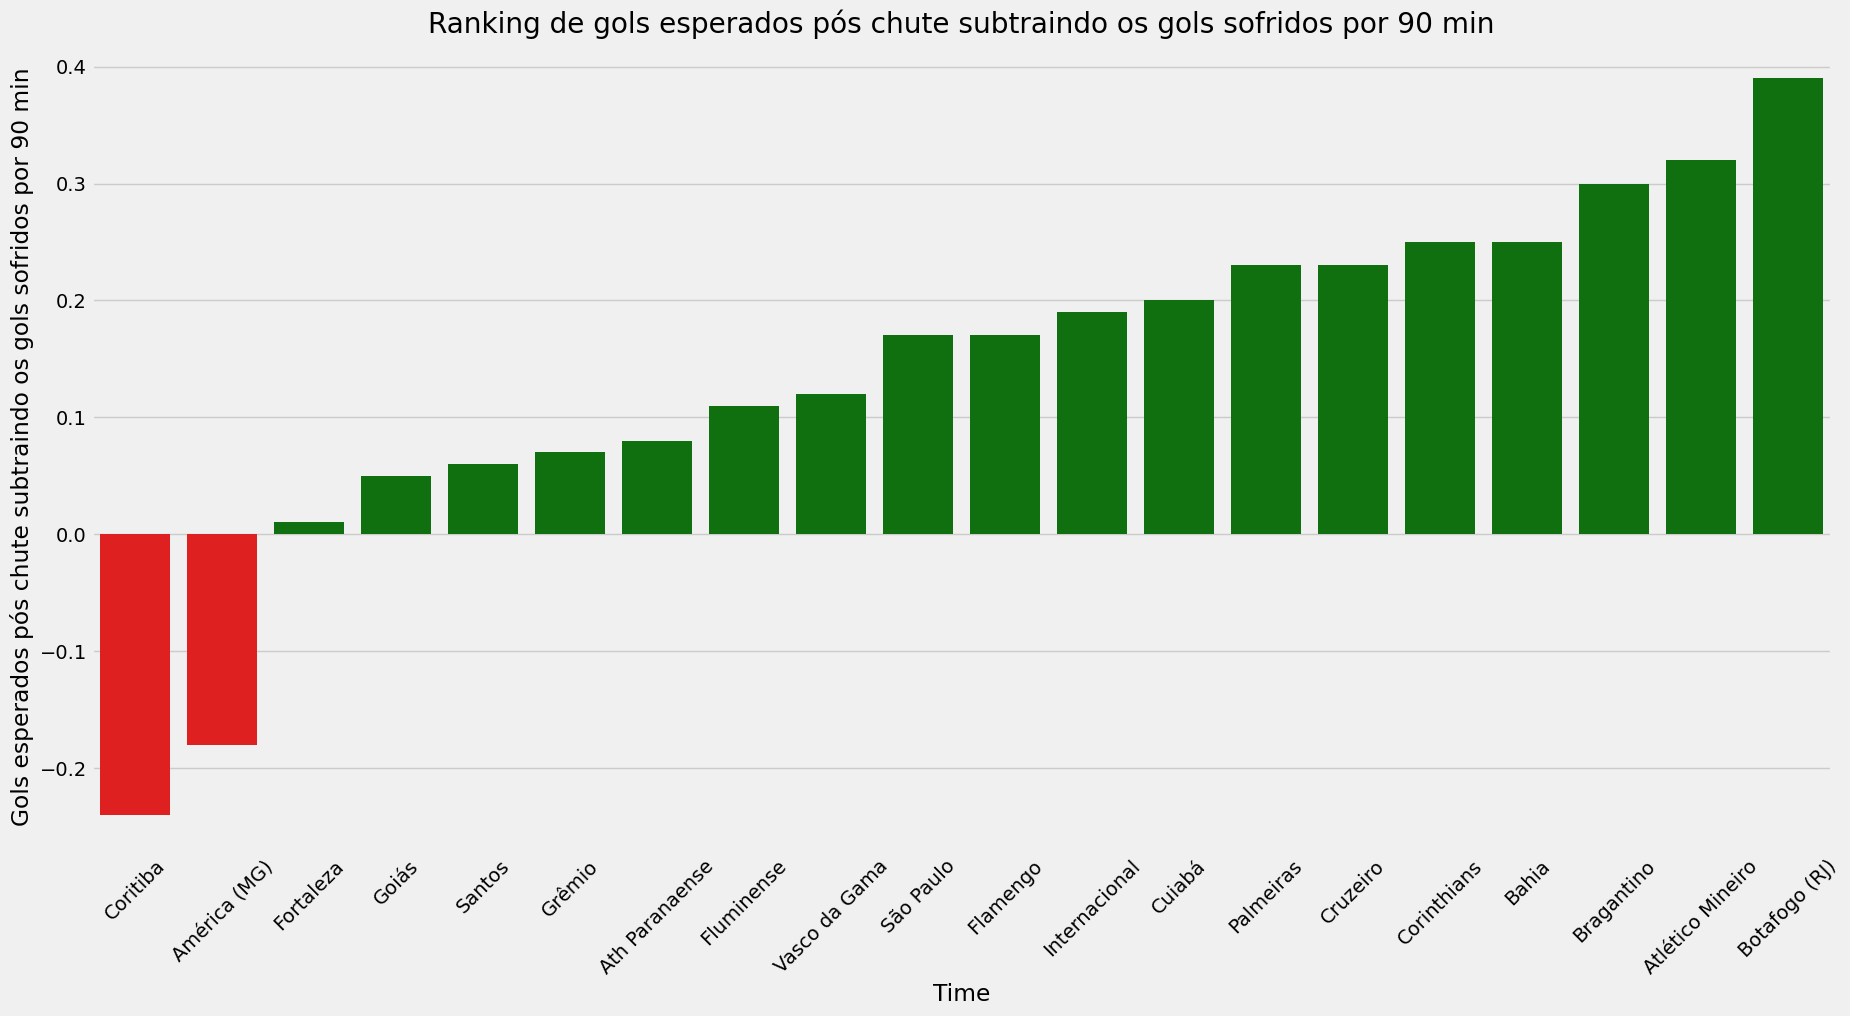

In [13]:
df_ordenado_por_gols_esperados_pos_chutes_menos_ga = df_goalkeeping_advanced_stats_general.sort_values('/90', ascending=True)
plt.figure(figsize=(20, 10))
plt.title("Ranking de gols esperados pós chute subtraindo os gols sofridos por 90 min")
plt.xlabel("Time")
plt.ylabel("Gols esperados pós chute subtraindo os gols sofridos por 90 min")
plt.xticks(rotation=45)
colors = ['red' if x < 0 else 'green' for x in df_ordenado_por_gols_esperados_pos_chutes_menos_ga['/90']]
sns.barplot(x = 'Squad', y = '/90', data = df_ordenado_por_gols_esperados_pos_chutes_menos_ga, palette = colors)

<Axes: title={'center': 'Ranking de distância média dos passes do goleiro'}, xlabel='Time', ylabel='Distância média dos passes (Jardas)'>

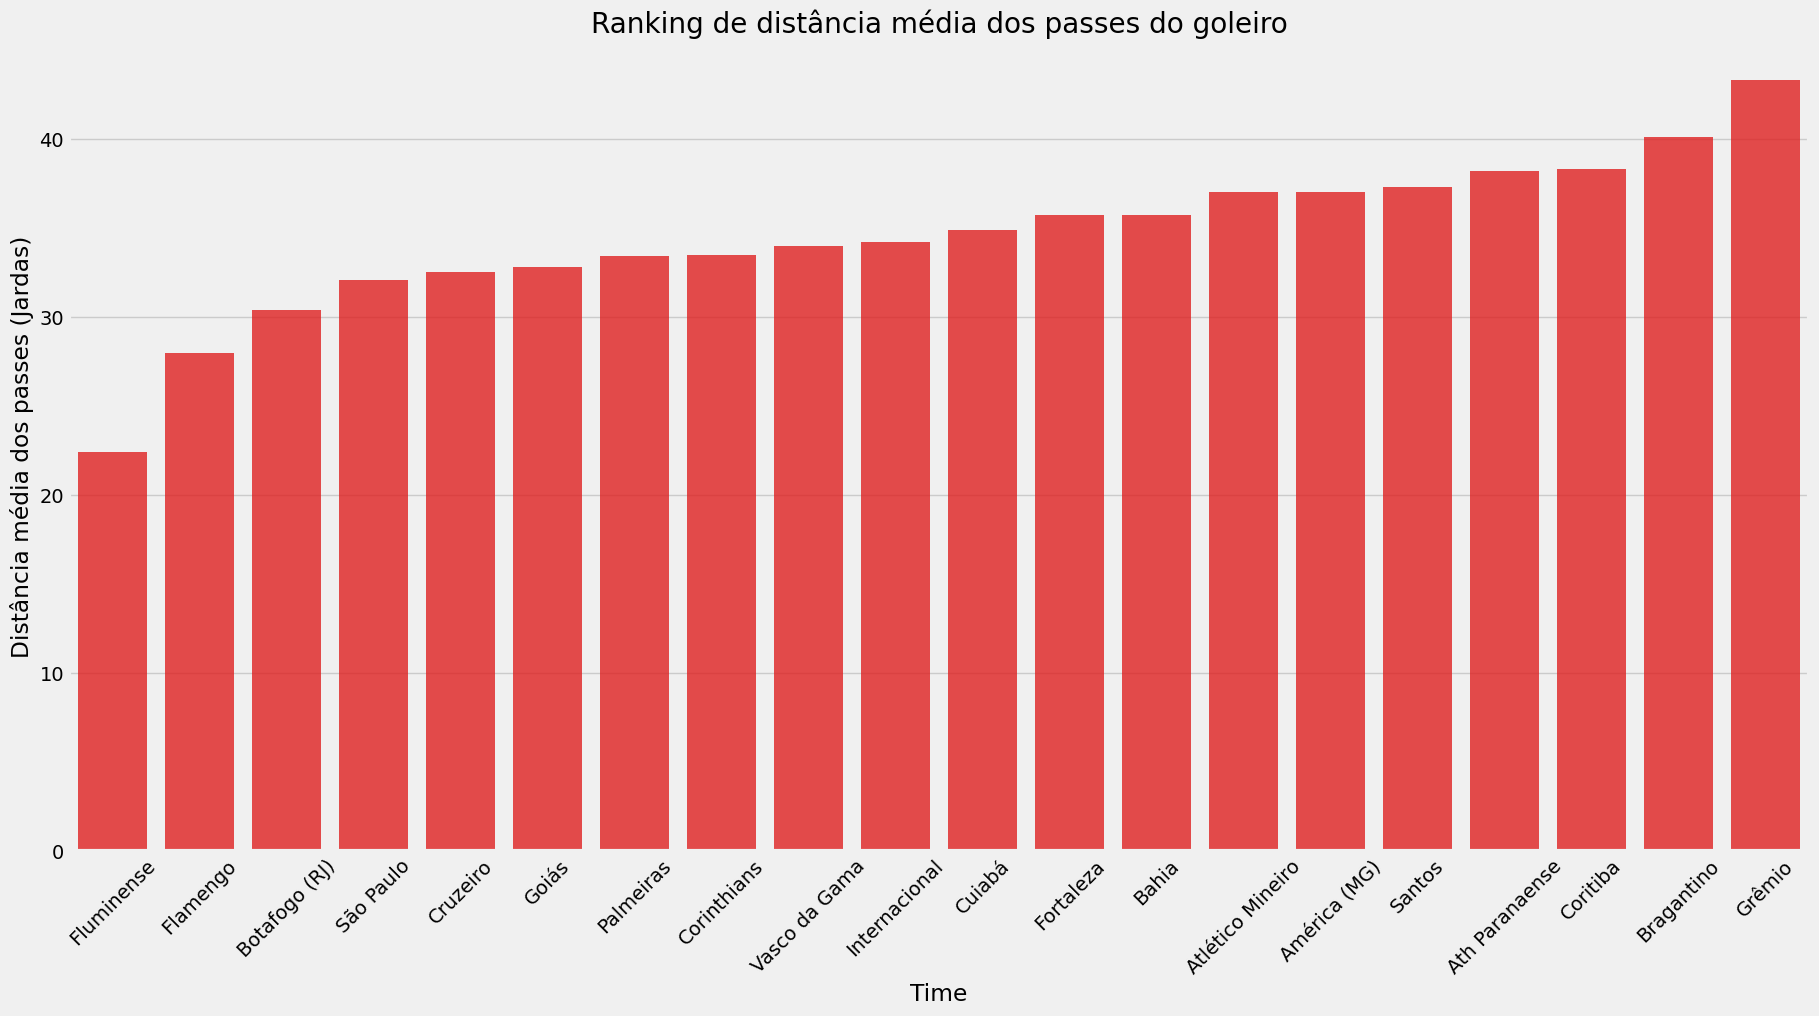

In [8]:
df_ordenado_por_distancia_dos_passes = df_goalkeeping_advanced_stats_general.sort_values('AvgLen', ascending=True)
plt.figure(figsize=(20, 10))
plt.title("Ranking de distância média dos passes do goleiro")
plt.xlabel("Time")
plt.ylabel("Distância média dos passes (Jardas)")
plt.xticks(rotation=45)
sns.barplot(x = 'Squad', y = 'AvgLen', data = df_ordenado_por_distancia_dos_passes, color = 'red', alpha = 0.8)

<Axes: title={'center': 'Ranking de lançamentos completos'}, xlabel='Time', ylabel='Lançamentos completos (%)'>

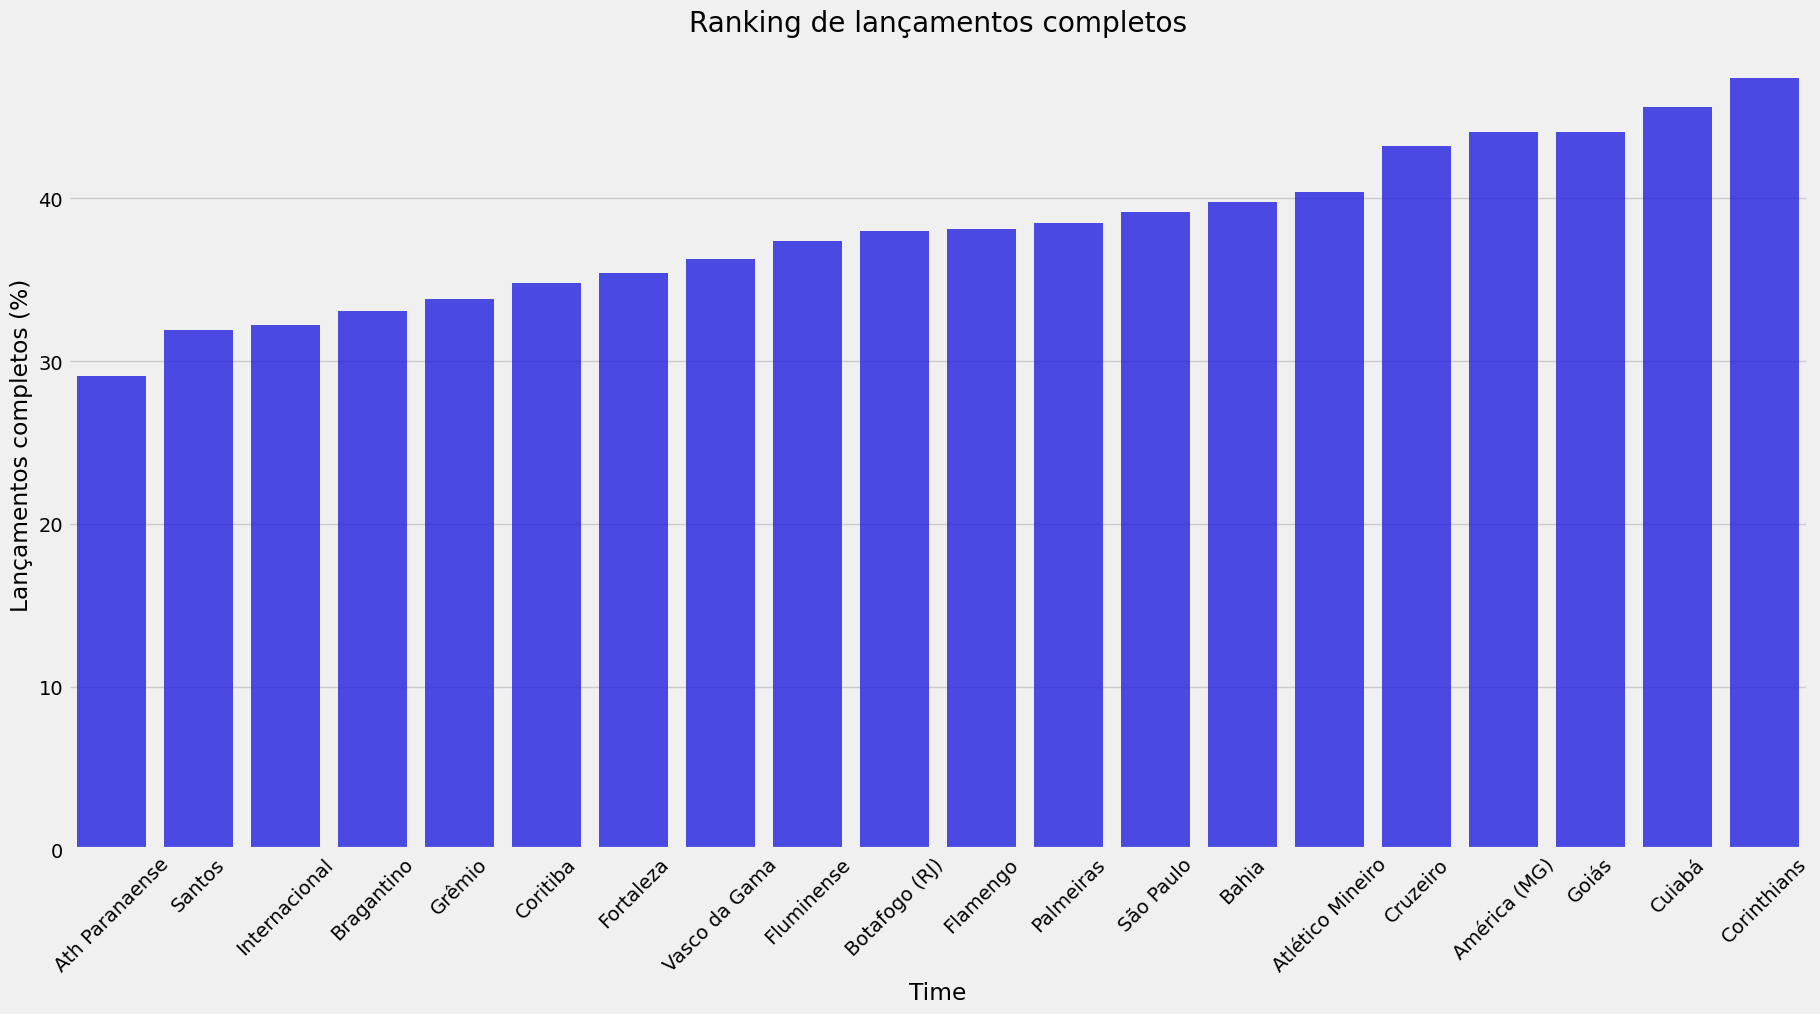

In [9]:
df_ordenado_por_lancamentos_completos = df_goalkeeping_advanced_stats_general.sort_values('Cmp%', ascending=True)
plt.figure(figsize=(20, 10))
plt.title("Ranking de lançamentos completos")
plt.xlabel("Time")
plt.ylabel("Lançamentos completos (%)")
plt.xticks(rotation=45)
sns.barplot(x = 'Squad', y = 'Cmp%', data = df_ordenado_por_lancamentos_completos, color = 'blue', alpha = 0.8)

<Axes: title={'center': 'Ranking de chutões no tiro de meta'}, xlabel='Time', ylabel='Chutões no tiro de meta (%)'>

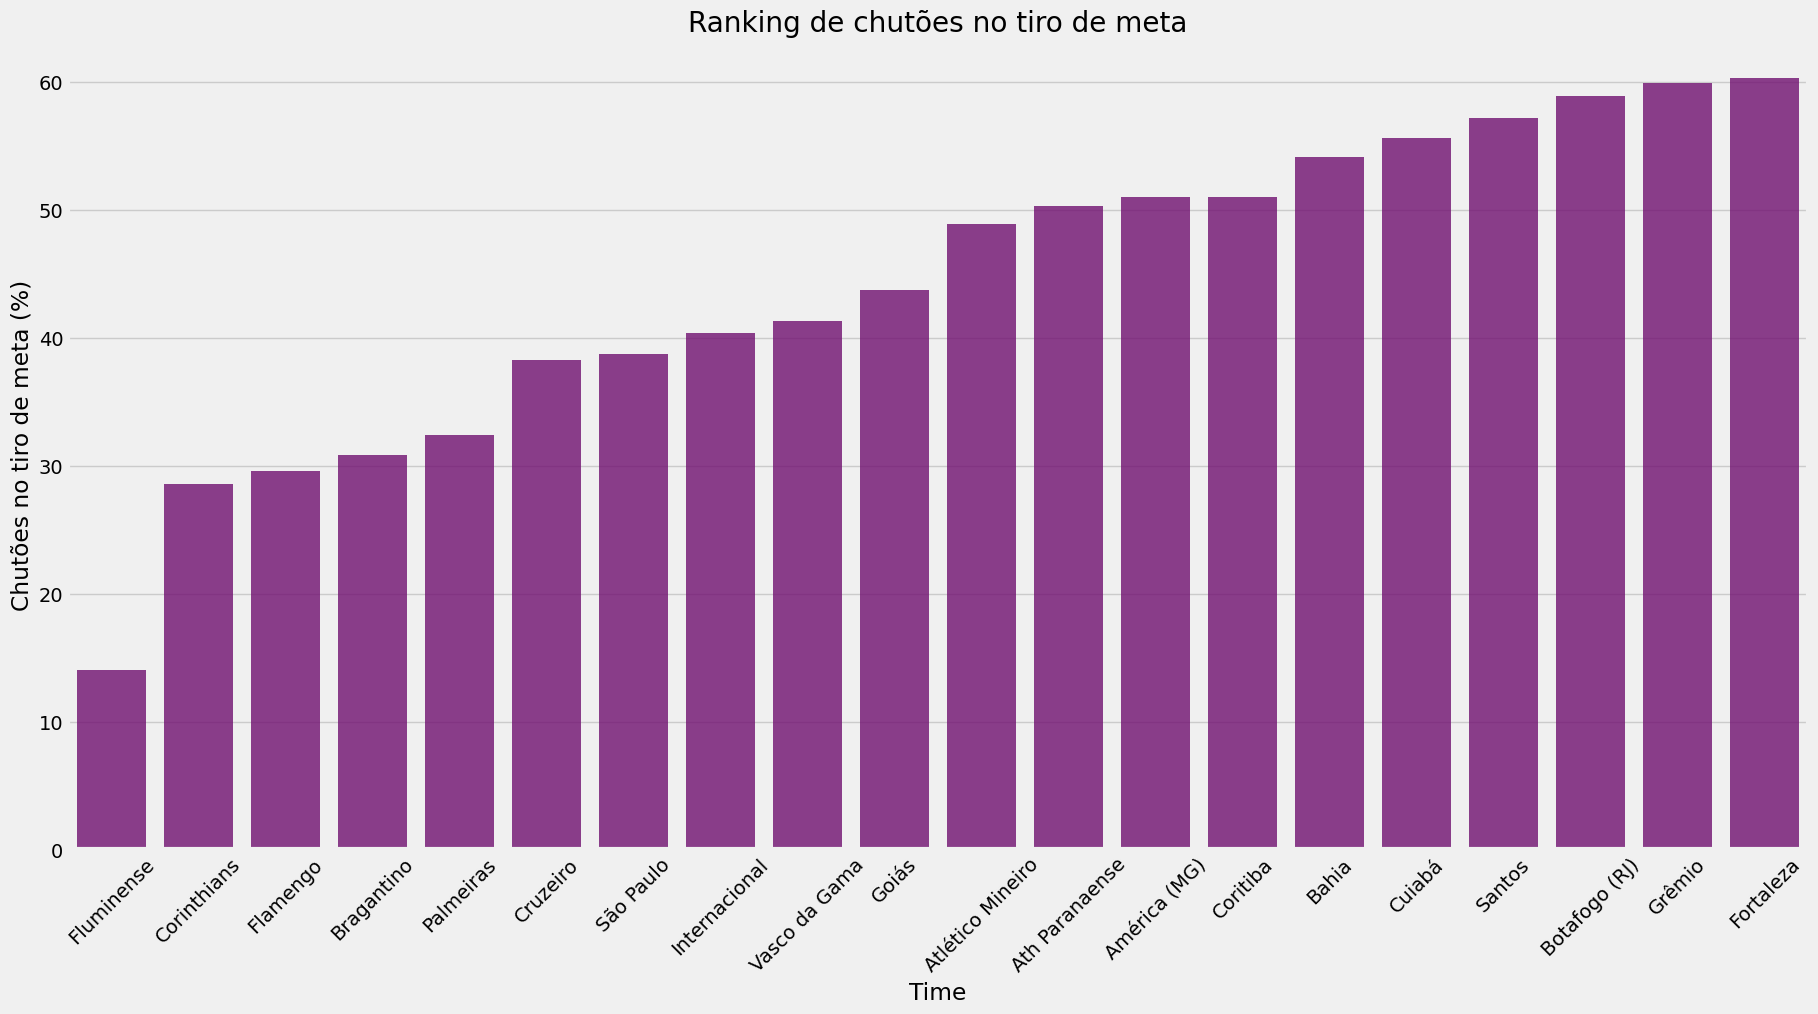

In [10]:
df_ordenado_por_chutoes_no_tiro_de_meta = df_goalkeeping_advanced_stats_general.sort_values('Launch%.1', ascending=True)
plt.figure(figsize=(20, 10))
plt.title("Ranking de chutões no tiro de meta")
plt.xlabel("Time")
plt.ylabel("Chutões no tiro de meta (%)")
plt.xticks(rotation=45)
sns.barplot(x = 'Squad', y = 'Launch%.1', data = df_ordenado_por_chutoes_no_tiro_de_meta, color = 'purple', alpha = 0.8)

<Axes: title={'center': 'Ranking de distância do tiro de meta'}, xlabel='Time', ylabel='Distância média do tiro de meta (Jardas)'>

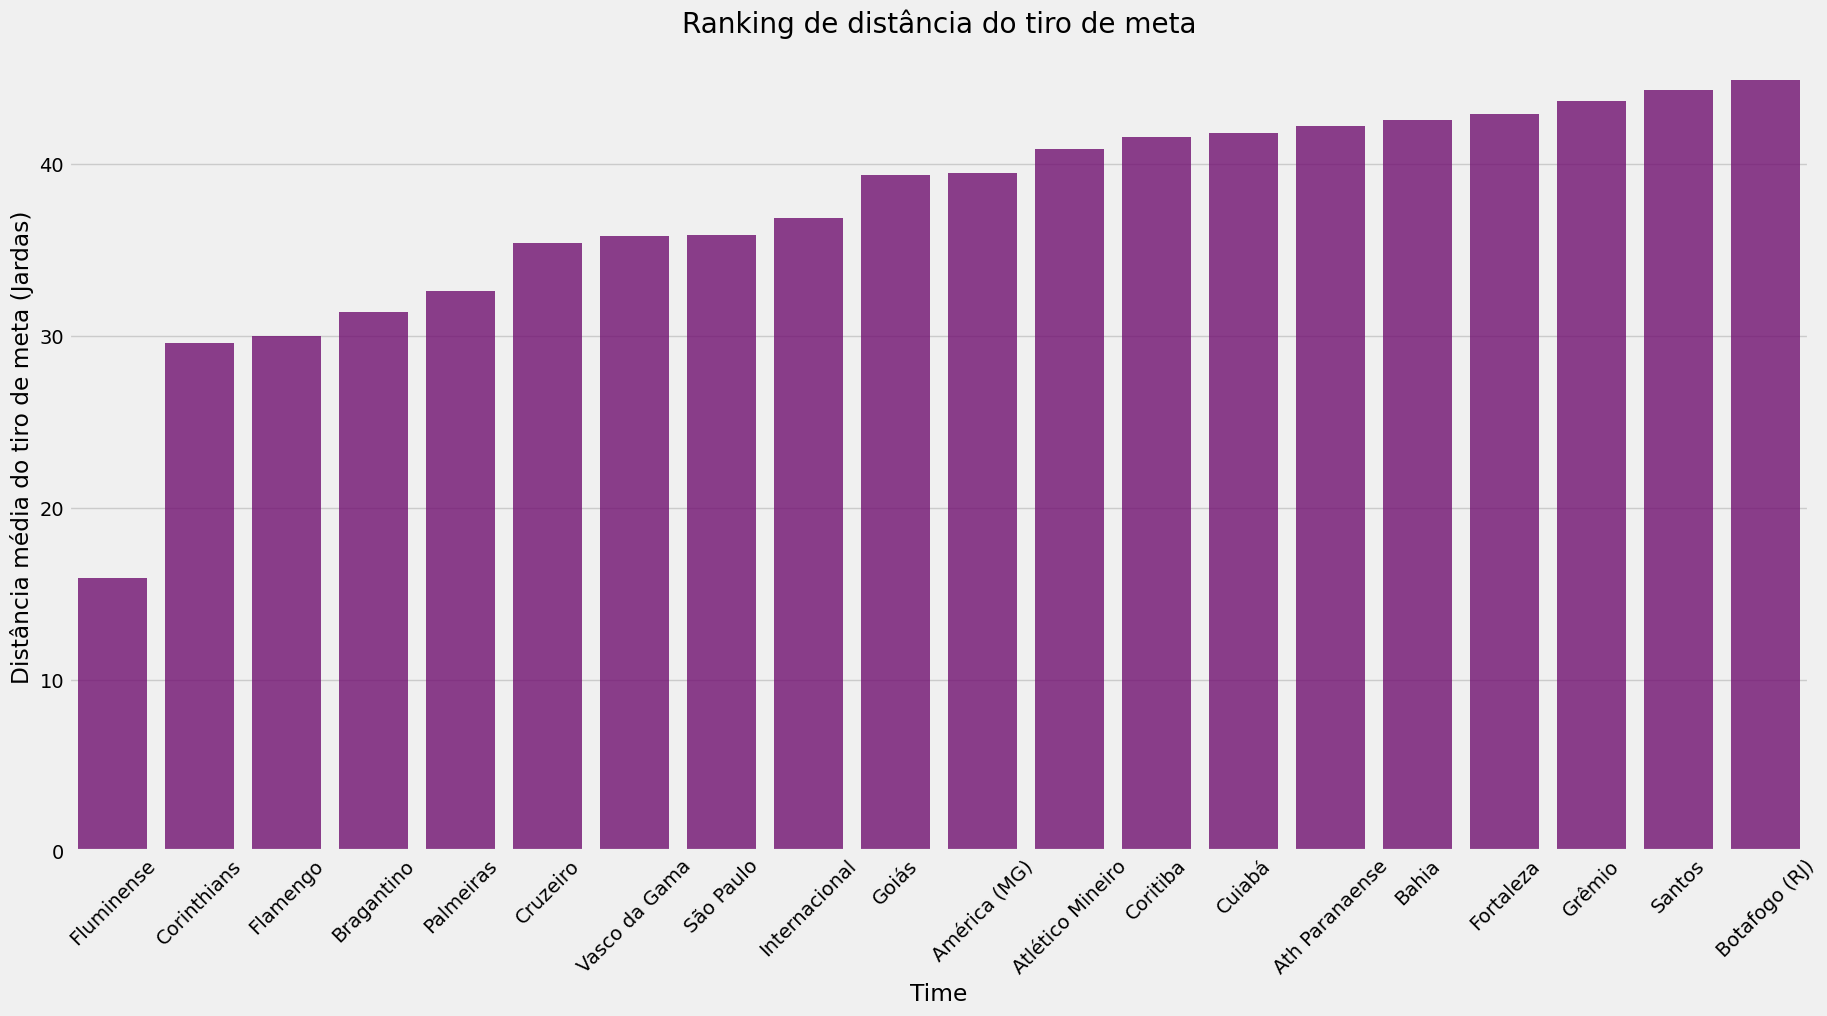

In [11]:
df_ordenado_por_distancia_dos_tiros_de_meta = df_goalkeeping_advanced_stats_general.sort_values('AvgLen.1', ascending=True)
plt.figure(figsize=(20, 10))
plt.title("Ranking de distância do tiro de meta")
plt.xlabel("Time")
plt.ylabel("Distância média do tiro de meta (Jardas)")
plt.xticks(rotation=45)
sns.barplot(x = 'Squad', y = 'AvgLen.1', data = df_ordenado_por_distancia_dos_tiros_de_meta, color = 'purple', alpha = 0.8)

C:\Users\Adriana\AppData\Local\Temp\ipykernel_9880\3008836612.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Squad', y = '#OPA/90', data = df_ordenado_por_acoes_defensivas_fora_da_area, palette = colors)


<Axes: title={'center': 'Ranking ações defensivas fora da grande area por 90 min'}, xlabel='Time', ylabel='Ações defensivas fora da grande area por 90 min'>

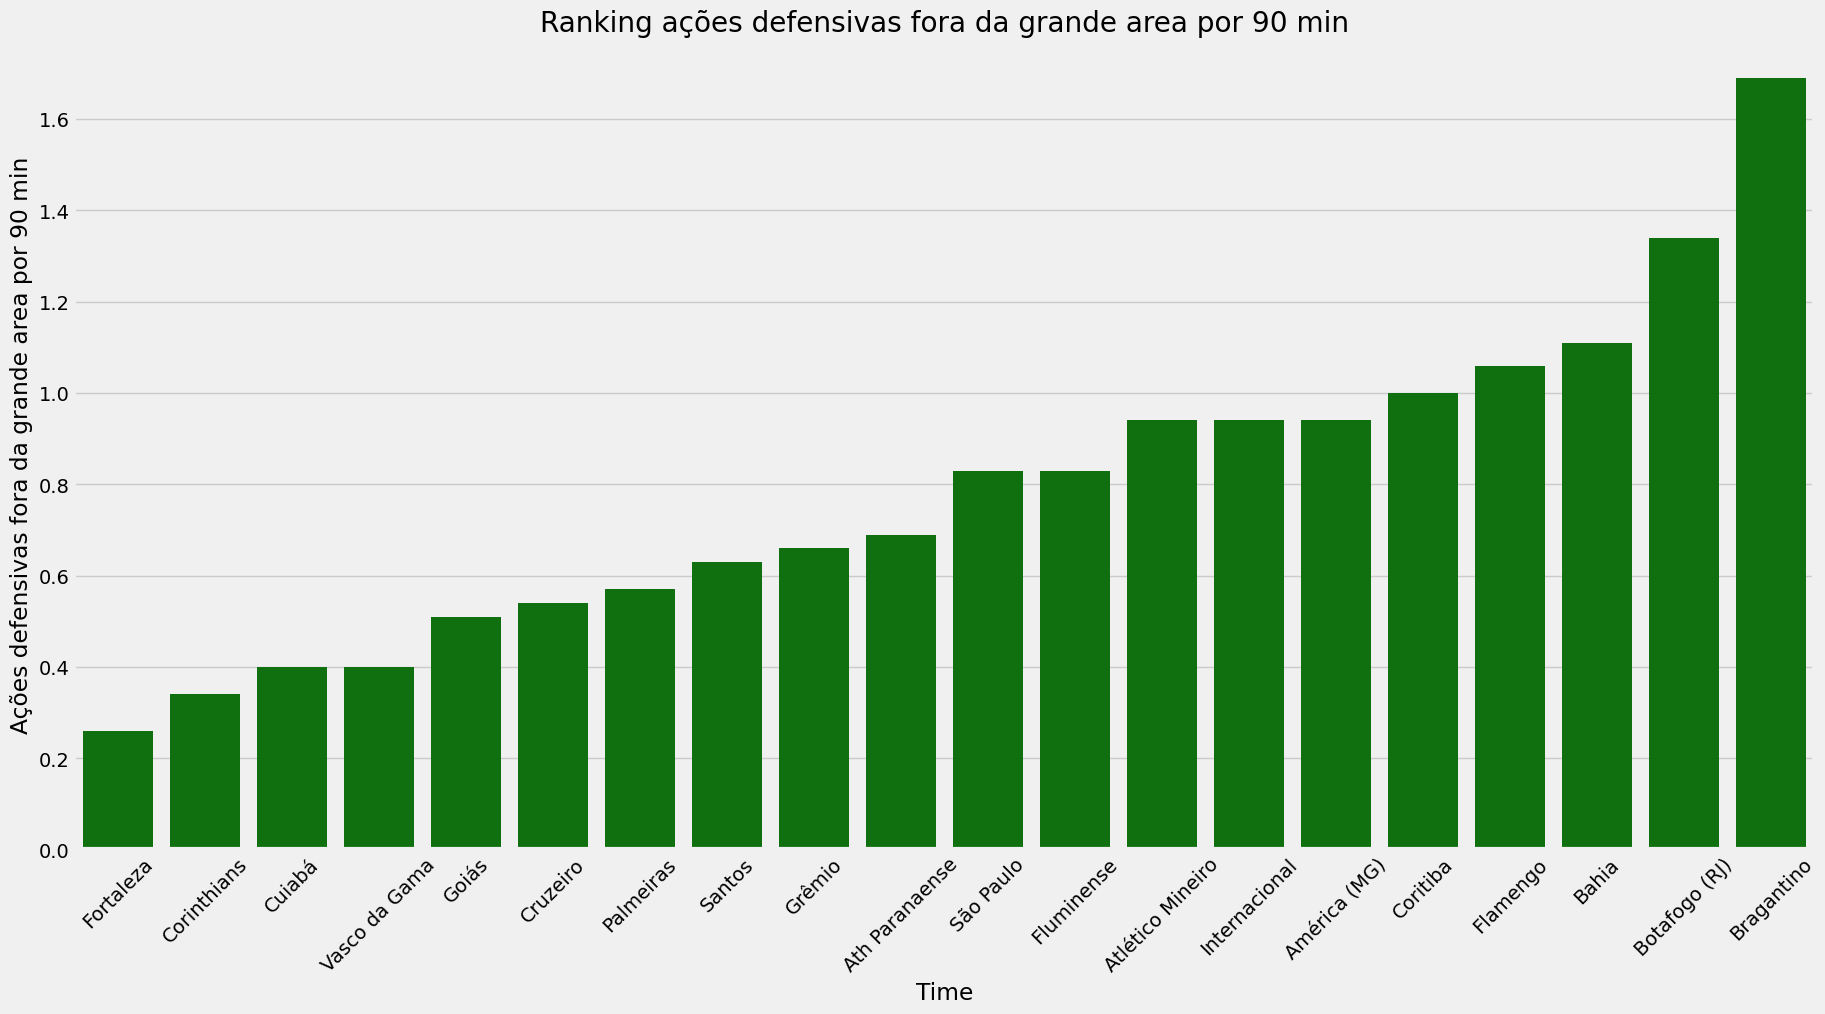

In [14]:
df_ordenado_por_acoes_defensivas_fora_da_area = df_goalkeeping_advanced_stats_general.sort_values('#OPA/90', ascending=True)
plt.figure(figsize=(20, 10))
plt.title("Ranking ações defensivas fora da grande area por 90 min")
plt.xlabel("Time")
plt.ylabel("Ações defensivas fora da grande area por 90 min")
plt.xticks(rotation=45)
colors = ['red' if x < 0 else 'green' for x in df_ordenado_por_acoes_defensivas_fora_da_area['#OPA/90']]
sns.barplot(x = 'Squad', y = '#OPA/90', data = df_ordenado_por_acoes_defensivas_fora_da_area, palette = colors)